In [690]:
# Import required models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.svm import SVC

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Split the Data into Training and Testing Sets

In [699]:
# Read csv files and display the DataFrame
data_white_train = Path('Resources/white_train_norm.csv')
df_white_train = pd.read_csv(data_white_train, sep = ',')

data_white_test = Path('Resources/white_test_norm.csv')
df_white_test = pd.read_csv(data_white_test, sep = ',')

display(df_white_train.head())
display(df_white_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.939877,0.553966,0.711379,2.016530,0.303659,3.530348,111.0,0.997567,3.14,0.742896,12.4,6
1,1.846915,0.629961,0.760590,2.263702,0.344822,3.634241,195.0,0.998932,3.18,0.804145,9.5,5
2,1.775808,0.683990,0.691042,1.948695,0.333222,2.924018,95.0,0.997554,3.25,0.788374,11.1,6
3,1.903778,0.574890,0.704730,1.193483,0.330193,3.207534,101.0,0.997711,3.21,0.814325,10.8,7
4,1.974681,0.669433,0.638250,2.666059,0.375629,3.301927,174.0,0.999920,3.20,0.793701,10.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.817121,0.661911,0.742896,2.210419,0.363424,3.802952,5.301459,0.99370,3.09,0.838721,10.966667,7
1,1.754411,0.809267,0.542884,1.392477,0.330193,3.239612,5.039684,0.98856,3.20,0.809267,13.200000,8
2,1.921997,0.629961,0.730614,1.280579,0.330193,3.107233,4.986631,0.99080,3.28,0.754784,12.200000,8
3,1.939877,0.654213,0.704730,1.169607,0.377976,3.141381,5.289572,0.99178,3.18,0.777498,10.700000,5
4,1.866256,0.683990,0.697953,1.786316,0.353035,3.000000,4.497941,0.99184,3.28,0.843433,12.000000,7


In [700]:
# Define a function that maps values from 1-6 and 7-10.
def map_wine_quality(value):
    if value >= 1 and value <= 6:
        return 0
    elif value >= 7 and value <= 10:
        return 1
    else:
        return None

In [693]:
# use the apply method to create a new column based on the existing column
df_white_train['wine quality'] = df_white_train['quality'].apply(map_wine_quality)
df_white_test['wine quality'] = df_white_test['quality'].apply(map_wine_quality)

In [675]:
# Drop 'quality' column
df_white_train = df_white_train.drop('quality', axis=1)

df_white_test = df_white_test.drop('quality', axis=1)

In [694]:
# Drop 'quality' column and low value features
df_white_train = df_white_train.drop(['quality', 'total sulfur dioxide',
                                     'density', 'citric acid', 'residual sugar'], axis=1)

df_white_test = df_white_test.drop(['quality', 'total sulfur dioxide',
                                     'density', 'citric acid', 'residual sugar'], axis=1)

In [695]:
# Split the data into X and y
X_train = df_white_train.drop('wine quality', axis=1)
y_train = df_white_train['wine quality']
X_test = df_white_test.drop('wine quality', axis=1)
y_test = df_white_test['wine quality']

## Create a Support Vector Machine Algorithm

In [696]:
# Create a SVM classifier
clf = svm.SVC(C=.1, kernel='linear')

# Train the classifier on the training set
model = clf.fit(X_train, y_train)

In [697]:
# Save the trained model to a file
filename = 'Pickle/svm_model_white.sav'
pickle.dump(model, open(filename, 'wb'))

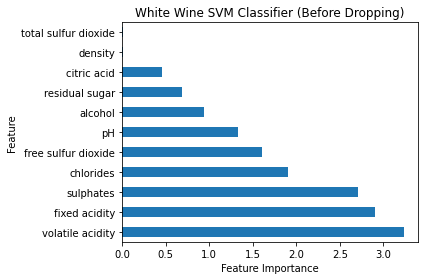

In [603]:
# get feature importances from SVM model
coef = abs(model.coef_)
coef_series = pd.Series(coef[0], index=X_train.columns)
coef_series_sorted = coef_series.sort_values(ascending=False)

# create horizontal bar chart of feature importances
ax = coef_series_sorted.plot(kind='barh')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('White Wine SVM Classifier (Before Dropping)')
plt.tight_layout()
# plt.savefig('Images/SVM_Feature_Importance_White_Before.jpg', dpi=300)

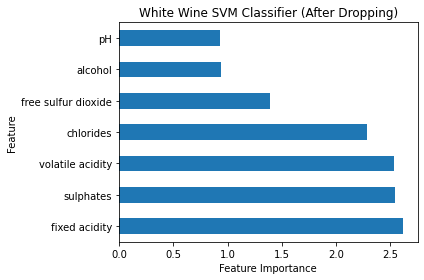

In [698]:
# get feature importances from SVM model
coef = abs(model.coef_)
coef_series = pd.Series(coef[0], index=X_train.columns)
coef_series_sorted = coef_series.sort_values(ascending=False)

# create horizontal bar chart of feature importances
ax = coef_series_sorted.plot(kind='barh')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('White Wine SVM Classifier (After Dropping)')
plt.tight_layout()
# plt.savefig('Images/SVM_Feature_Importance_White_After', dpi=300)

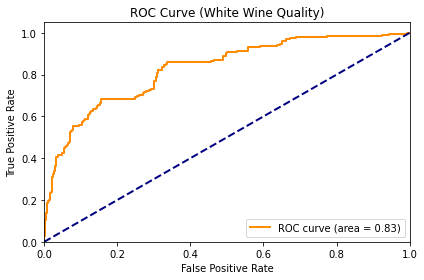

In [671]:
# Generate ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (White Wine Quality)')
plt.legend(loc="lower right")
plt.tight_layout()
# plt.savefig('Images/ROC_White', dpi=300)
plt.show()

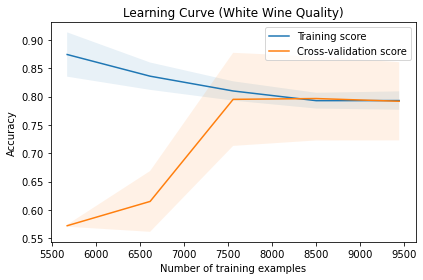

In [669]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# Compute the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (White Wine Quality)')
plt.tight_layout()
# plt.savefig('Images/Learning_Curve_White.jpg', dpi=300)
plt.show()

In [678]:
# Use the model to make predictions on the testing data
training_predictions = model.predict(X_train)
testing_predictions = clf.predict(X_test)

### Before Dropping Low Value Features

In [679]:
# Create and save the balanced accuracy score
training_accuracy_score = balanced_accuracy_score(y_train, training_predictions)

# Print the balance accuracy score for the training data
training_accuracy_score

0.7876654811302114

In [680]:
# Create and save the balanced accuracy score
testing_accuracy_score = balanced_accuracy_score(y_test, testing_predictions)

# Print the balance accuracy score for the testing data
testing_accuracy_score

0.6870481927710843

In [681]:
# Create and save the confusion matrix for the testing data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the testing data
print(training_matrix)

[[5741 1007]
 [1394 3667]]


In [682]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[889 771]
 [134 696]]


In [683]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      6748
           1       0.78      0.72      0.75      5061

    accuracy                           0.80     11809
   macro avg       0.79      0.79      0.79     11809
weighted avg       0.80      0.80      0.80     11809



In [684]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.87      0.54      0.66      1660
           1       0.47      0.84      0.61       830

    accuracy                           0.64      2490
   macro avg       0.67      0.69      0.63      2490
weighted avg       0.74      0.64      0.64      2490



### After Dropping Low Value Features

In [628]:
training_accuracy_score = balanced_accuracy_score(y_train, training_predictions)
training_accuracy_score

0.7799100968188104

In [629]:
testing_accuracy_score = balanced_accuracy_score(y_test, testing_predictions)
testing_accuracy_score

0.7515060240963856

In [590]:
# Create and save the confusion matrix for the testing data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the testing data
print(training_matrix)

[[5795  953]
 [1513 3548]]


In [591]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[1437  223]
 [ 301  529]]


In [592]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

         bad       0.79      0.86      0.82      6748
        good       0.79      0.70      0.74      5061

    accuracy                           0.79     11809
   macro avg       0.79      0.78      0.78     11809
weighted avg       0.79      0.79      0.79     11809



In [593]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

         bad       0.83      0.87      0.85      1660
        good       0.70      0.64      0.67       830

    accuracy                           0.79      2490
   macro avg       0.77      0.75      0.76      2490
weighted avg       0.79      0.79      0.79      2490

